In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# plotting parameters
%matplotlib inline
plt.rcParams['figure.figsize'] = (6, 6)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.facecolor'] = 'w'

In [3]:
# load scraped data
df_raw = pd.read_csv('../data/IMDB_Top250_features_raw.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UID                         250 non-null    int64  
 1   aspect ratio                250 non-null    object 
 2   rating                      250 non-null    float64
 3   title                       250 non-null    object 
 4   votes                       250 non-null    int64  
 5   year                        250 non-null    int64  
 6   Budget                      240 non-null    object 
 7   Cumulative Worldwide Gross  188 non-null    object 
 8   countries                   250 non-null    object 
 9   directors                   250 non-null    object 
 10  genres                      250 non-null    object 
 11  genres.1                    224 non-null    object 
 12  genres.2                    150 non-null    object 
 13  runtimes                    250 non

# Visualize Missing Data

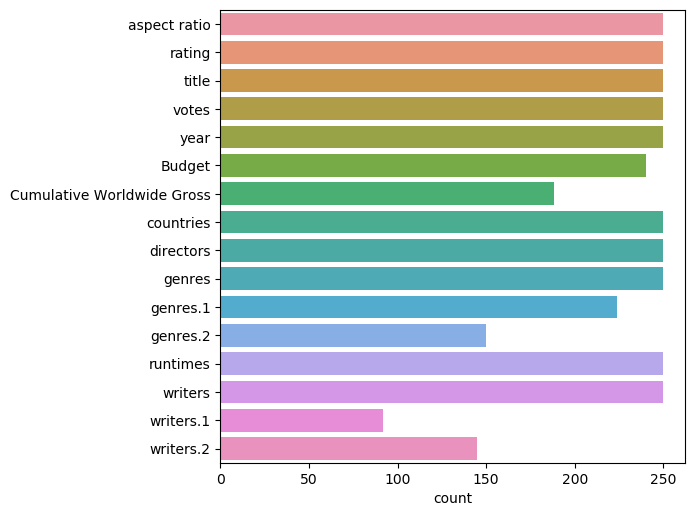

In [4]:
# visualize missing data
df_var_counts = pd.DataFrame(df_raw.groupby('UID').count().sum().reset_index())
df_var_counts.columns = ['var', 'count']
sns.barplot(x='count', y='var', data=df_var_counts)
plt.ylabel('')
plt.show()

# How many genres?

In [5]:
genres_all = pd.concat((df_raw.genres, df_raw['genres.1'], df_raw['genres.2'])).reset_index(drop=True)
genres_set = set(genres_all)
genres_set

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western',
 nan}

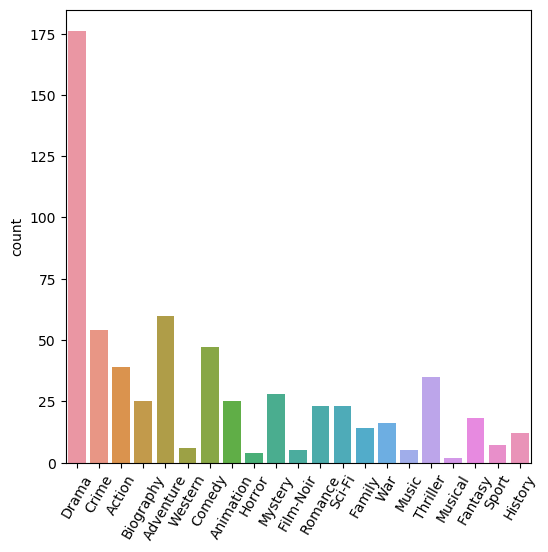

In [6]:
sns.countplot(genres_all)
plt.xticks(fontsize=10, rotation=60)
plt.show()

# Runtimes

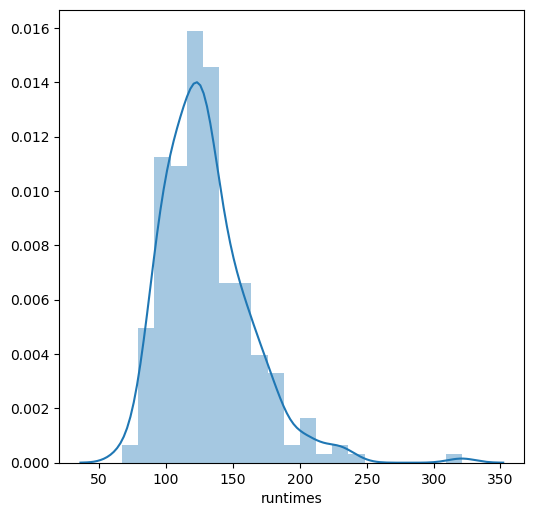

In [7]:
sns.distplot(df_raw.runtimes)
plt.show()

## Correlation between runtime and rating?

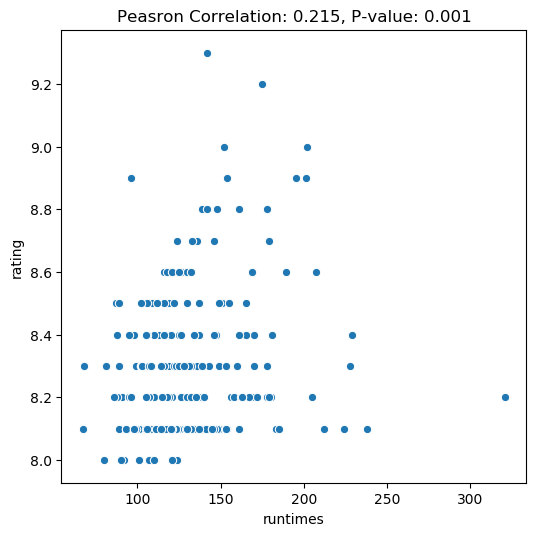

In [8]:
sns.scatterplot(x='runtimes', y='rating', data=df_raw)
plt.title('Peasron Correlation: %0.3f, P-value: %0.3f' %
          stats.pearsonr(df_raw.runtimes, df_raw.rating))
plt.show()

## Correlation between votes and rating?

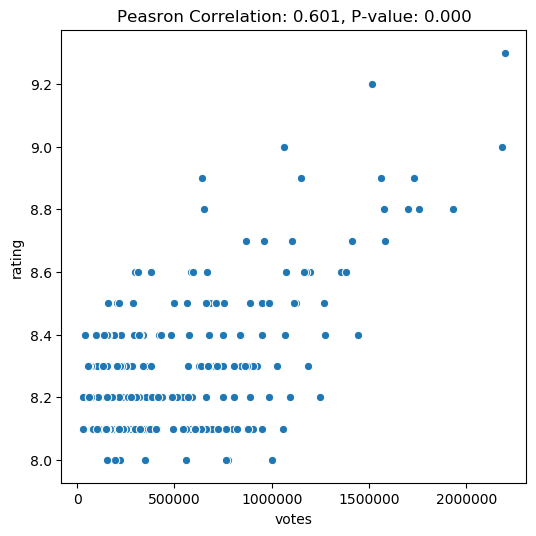

In [9]:
sns.scatterplot(x='votes', y='rating', data=df_raw)
plt.title('Peasron Correlation: %0.3f, P-value: %0.3f' %
          stats.pearsonr(df_raw.votes, df_raw.rating))
plt.show()

# How many countries?

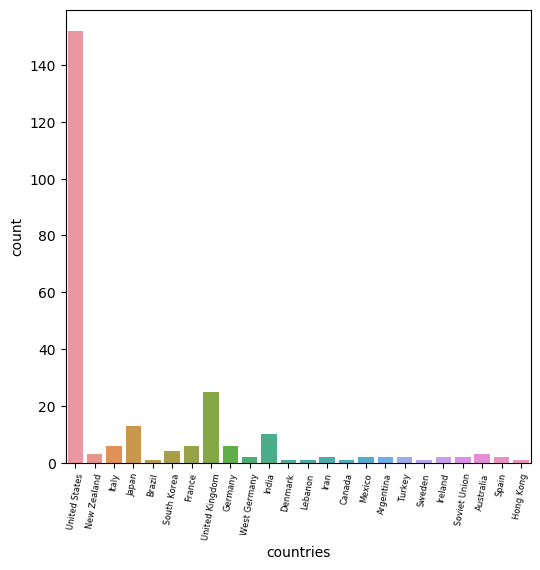

In [10]:
sns.countplot(df_raw.countries)
plt.xticks(fontsize=6, rotation=80)
plt.show()